# **Regression Analysis**

In [ ]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings("ignore")

# Import Dataset.
""" https://www.kaggle.com/farhanmd29/50-startups """
dataset = pd.read_csv("50_Startups.csv")
print(dataset.head())

# Split dataset into features and target variables.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encode Categorical Data.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])], remainder="passthrough"
)
X = np.array(ct.fit_transform(X))

# Feature Scaling.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# Split dataset into Training Set and Test Set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


## **MultiCollinearity.**

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 30 May 2023   Prob (F-statistic):           1.34e-27
Time:                        08:25:06   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1334.905     83.911      0.0

## **Train the Multiple Linear Regression Model.**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

# Predict the Test set results.
y_pred = regressor.predict(X_test)

# Calculate the Mean-Squared Error.
from sklearn.metrics import mean_squared_error

print("Mean-Squared Error (MSE) is", mean_squared_error(y_test, y_pred))

# Calculate the Mean-Absolute Error.
from sklearn.metrics import mean_absolute_error

print("Mean-Absolute Error (MAE) is", mean_absolute_error(y_test, y_pred))

# Calculate the Mean-Squared Log Error.
from sklearn.metrics import mean_squared_log_error

print("Mean-Squared Log Error is", mean_squared_log_error(y_test, y_pred))

# Calculate the Explained Variance Score.
from sklearn.metrics import explained_variance_score

print("Explained Variance Score is", explained_variance_score(y_test, y_pred))

# Calculate the R2 Score.
from sklearn.metrics import r2_score

print("R2 Score is", r2_score(y_test, y_pred))

Mean-Squared Error (MSE) is 82010363.04501335
Mean-Absolute Error (MAE) is 6961.477813275551
Mean-Squared Log Error is 0.025867630987874236
Explained Variance Score is 0.9022172344905681
R2 Score is 0.8987266414319841


# **Ridge Regression.**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {
    "alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]
}
ridge_regressor = GridSearchCV(
    ridge, parameters, scoring="neg_mean_squared_error", cv=10
)
ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

# Predict the Test set results.
ridge_pred = ridge_regressor.predict(X_test)

# Calculate the Mean-Squared Error.
from sklearn.metrics import mean_squared_error

print("Mean-Squared Error (MSE) is", mean_squared_error(y_test, ridge_pred))

# Calculate the Mean-Absolute Error.
from sklearn.metrics import mean_absolute_error

print("Mean-Absolute Error (MAE) is", mean_absolute_error(y_test, ridge_pred))

# Calculate the Mean-Squared Log Error.
from sklearn.metrics import mean_squared_log_error

print("Mean-Squared Log Error is", mean_squared_log_error(y_test, ridge_pred))

# Calculate the Explained Variance Score.
from sklearn.metrics import explained_variance_score

print("Explained Variance Score is", explained_variance_score(y_test, ridge_pred))

# Calculate the R2 Score.
from sklearn.metrics import r2_score

print("R2 Score is", r2_score(y_test, ridge_pred))

{'alpha': 1e-15}
-110825659.60341243
Mean-Squared Error (MSE) is 82010363.04501352
Mean-Absolute Error (MAE) is 6961.477813275555
Mean-Squared Log Error is 0.02586763098787439
Explained Variance Score is 0.9022172344905679
R2 Score is 0.8987266414319839


# **Lasso Regression.**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {
    "alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]
}
lasso_regressor = GridSearchCV(
    lasso, parameters, scoring="neg_mean_squared_error", cv=10
)
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

# Predict the Test set results.
lasso_pred = lasso_regressor.predict(X_test)

# Calculate the Mean-Squared Error.
from sklearn.metrics import mean_squared_error

print("Mean-Squared Error (MSE) is", mean_squared_error(y_test, lasso_pred))

# Calculate the Mean-Absolute Error.
from sklearn.metrics import mean_absolute_error

print("Mean-Absolute Error (MAE) is", mean_absolute_error(y_test, lasso_pred))

# Calculate the Mean-Squared Log Error.
from sklearn.metrics import mean_squared_log_error

print("Mean-Squared Log Error is", mean_squared_log_error(y_test, lasso_pred))

# Calculate the Explained Variance Score.
from sklearn.metrics import explained_variance_score

print("Explained Variance Score is", explained_variance_score(y_test, lasso_pred))

# Calculate the R2 Score.
from sklearn.metrics import r2_score

print("R2 Score is", r2_score(y_test, lasso_pred))

{'alpha': 100}
-109571822.7489316
Mean-Squared Error (MSE) is 80253210.78448263
Mean-Absolute Error (MAE) is 6919.560483786932
Mean-Squared Log Error is 0.02536537432945286
Explained Variance Score is 0.9040914534635538
R2 Score is 0.9008965222169485


# **Visualize Multiple Linear Regression.**

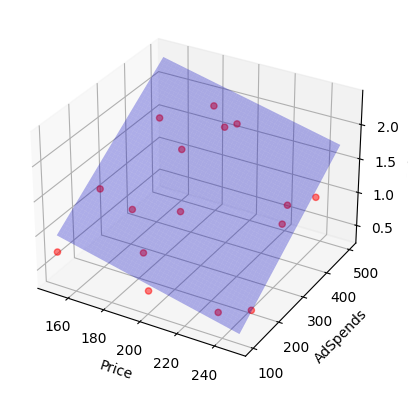

In [ ]:
X = [
    [150, 100],
    [159, 200],
    [170, 350],
    [175, 400],
    [179, 500],
    [180, 180],
    [189, 159],
    [199, 110],
    [199, 400],
    [199, 230],
    [235, 120],
    [239, 340],
    [239, 360],
    [249, 145],
    [249, 400],
    [210, 369],
]
Y = [
    0.73,
    1.39,
    2.03,
    1.45,
    1.82,
    1.32,
    0.83,
    0.53,
    1.95,
    1.27,
    0.49,
    1.03,
    1.24,
    0.55,
    1.3,
    2.17,
]

df = pd.DataFrame(X, columns=["Price", "AdSpends"])
df["Sales"] = pd.Series(Y)

# Apply Multiple Linear Regression.
model = smf.ols(formula="Sales ~ Price + AdSpends", data=df)
results_formula = model.fit()
results_formula.params

# Prepare the Data for Visualization.
x_surf, y_surf = np.meshgrid(
    np.linspace(df.Price.min(), df.Price.max(), 100),
    np.linspace(df.AdSpends.min(), df.AdSpends.max(), 100),
)
onlyX = pd.DataFrame({"Price": x_surf.ravel(), "AdSpends": y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

# Convert the predicted result into an array.
fittedY = np.array(fittedY)

# Visualize the Data for Multiple Linear Regression.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["Price"], df["AdSpends"], df["Sales"], c="red", marker="o", alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color="b", alpha=0.3)
ax.set_xlabel("Price")
ax.set_ylabel("AdSpends")
ax.set_zlabel("Sales")
plt.show()